In [1]:
import pandas as pd 
import seaborn as sns

In [2]:
gaia_PAN = pd.read_csv('e:/gaia_PAN_Dedulek.csv')
gaia = pd.read_csv('e:/gaia_200pc_l0_180.gzip')

In [45]:
col = ['source_id','ra_x','dec_x','MG', 'Teff', 'Te_gr','Te_ri','Te_iz','dist_pc',
       'gMeanPSFMag','rMeanPSFMag','iMeanPSFMag','zMeanPSFMag',
       'g_r','r_i','i_z']

In [37]:
gaia_PAN['g_r'] = gaia_PAN.gMeanPSFMag - gaia_PAN.rMeanPSFMag
gaia_PAN['r_i'] = gaia_PAN.rMeanPSFMag - gaia_PAN.iMeanPSFMag
gaia_PAN['i_z'] = gaia_PAN.iMeanPSFMag - gaia_PAN.zMeanPSFMag
gaia_PAN['Te_gr'] = 1.09/(gaia_PAN.g_r[gaia_PAN.g_r >= -.5] +1.47)*1e4
gaia_PAN['Te_ri'] = 0.5/(gaia_PAN.r_i[gaia_PAN.r_i >= -.5] +.78)*1e4
gaia_PAN['Te_iz'] = 0.38/(gaia_PAN.i_z[gaia_PAN.i_z >= -.5] +.64)*1e4

In [46]:
gaia_x_PAN = gaia_PAN.merge(gaia,'inner','source_id')[col]

In [39]:
gaia_x_PAN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1549521 entries, 0 to 1549520
Data columns (total 13 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   source_id    1549521 non-null  int64  
 1   ra_x         1549521 non-null  float64
 2   dec_x        1549521 non-null  float64
 3   MG           1549521 non-null  float64
 4   Teff         1549521 non-null  float64
 5   Te_gr        1530838 non-null  float64
 6   Te_ri        1524364 non-null  float64
 7   Te_iz        1535464 non-null  float64
 8   dist_pc      1549521 non-null  float64
 9   gMeanPSFMag  1549521 non-null  float64
 10  rMeanPSFMag  1549521 non-null  float64
 11  iMeanPSFMag  1549521 non-null  float64
 12  zMeanPSFMag  1549521 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 165.5 MB


In [26]:
import matplotlib.pyplot as plt

(array([[1.511500e+04, 5.186490e+05, 8.085290e+05, 8.380000e+04,
         2.616000e+04, 1.388900e+04, 7.131000e+03, 3.730000e+03,
         1.598000e+03, 3.000000e+02],
        [6.555060e+05, 4.173400e+05, 1.748010e+05, 2.909400e+04,
         4.054700e+04, 6.898000e+03, 3.828000e+03, 2.634000e+03,
         1.467000e+03, 5.400000e+02],
        [4.875480e+05, 6.512930e+05, 2.517340e+05, 7.729400e+04,
         1.609900e+04, 7.743000e+03, 4.393000e+03, 2.787000e+03,
         7.930000e+02, 2.840000e+02],
        [1.637900e+04, 1.160011e+06, 2.902660e+05, 4.091800e+04,
         1.700200e+04, 1.051500e+04, 6.057000e+03, 3.630000e+03,
         2.129000e+03, 6.630000e+02]]),
 array([ 2000.,  3000.,  4000.,  5000.,  6000.,  7000.,  8000.,  9000.,
        10000., 11000., 12000.]),
 <a list of 4 list[Polygon] objects>)

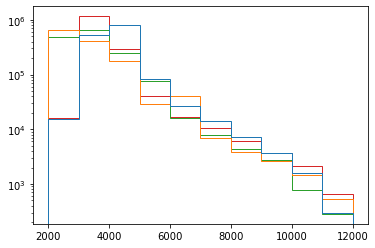

In [112]:
plt.hist(gaia_x_PAN[['Te_gr','Te_ri','Te_iz','Teff']], range=[2000,12000], histtype='step', log=True)

<AxesSubplot:>

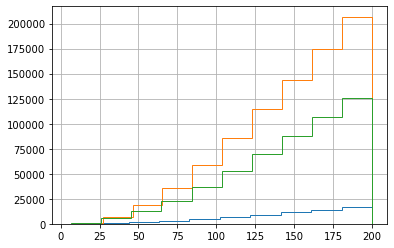

In [41]:
gaia_x_PAN.dist_pc[gaia_x_PAN.Te_gr < 3000].hist(histtype='step')
gaia_x_PAN.dist_pc[gaia_x_PAN.Te_ri < 3000].hist(histtype='step')
gaia_x_PAN.dist_pc[gaia_x_PAN.Te_iz < 3000].hist(histtype='step')

(1000.0, 10000.0)

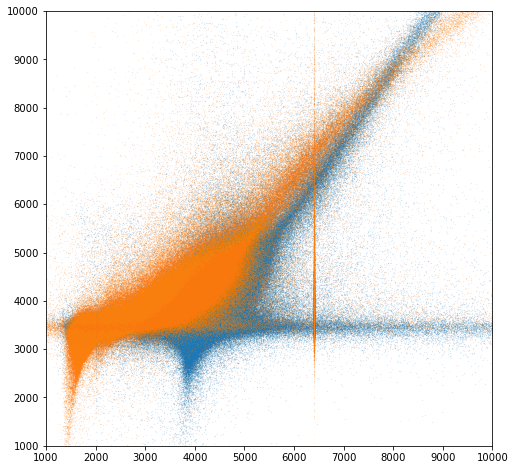

In [117]:
fig = plt.figure(figsize = (8,8))
plt.plot(gaia_x_PAN.Te_gr,gaia_x_PAN.Teff, '.', markersize=.1)# blue
plt.plot(gaia_x_PAN.Te_ri,gaia_x_PAN.Teff, '.', markersize=.1)# orange
#plt.plot(gaia_x_PAN.Te_iz,gaia_x_PAN.Teff, '.', markersize=.1)# green
plt.ylim(1000,10000)
plt.xlim(1000,10000)

In [48]:
gaia_x_PAN['B'] = gaia_x_PAN.gMeanPSFMag + 0.313*gaia_x_PAN.g_r + 0.227
gaia_x_PAN['V'] = gaia_x_PAN.gMeanPSFMag - 0.5784*gaia_x_PAN.g_r - 0.004
gaia_x_PAN['B_V'] = gaia_x_PAN.B - gaia_x_PAN.V
gaia_x_PAN['R_I'] = gaia_x_PAN.r_i + 0.212
gaia_x_PAN['V_K'] = 1.896*gaia_x_PAN.B_V + 1.131*gaia_x_PAN.R_I

<AxesSubplot:>

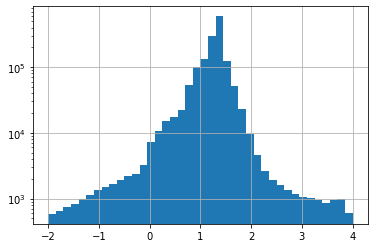

In [121]:
gaia_x_PAN.B_V.hist(range = (-2,4), bins=40, log=True)#

In [68]:
i = gaia_x_PAN.query('B_V >= -.4 & B_V < -.24').index
gaia_x_PAN['Te_bv']=53792. + 396497.*gaia_x_PAN.B_V[i] + 1063170.*gaia_x_PAN.B_V[i]**2
i = gaia_x_PAN.query('B_V >= -.24 & B_V < .01').index
gaia_x_PAN['Te_bv'][i]=9646. -  9088.*gaia_x_PAN.B_V[i] +135032.*gaia_x_PAN.B_V[i]**2
i = gaia_x_PAN.query('B_V >= .01 & B_V < .31').index
gaia_x_PAN['Te_bv'][i]=9451. -15715.*gaia_x_PAN.B_V[i] + 50067.*gaia_x_PAN.B_V[i]**2 - 74680.*gaia_x_PAN.B_V[i]**3
i = gaia_x_PAN.query('B_V >= .31 & B_V < 1.01').index
gaia_x_PAN['Te_bv'][i]=8856. - 6276.*gaia_x_PAN.B_V[i] + 2777.*gaia_x_PAN.B_V[i]**2 - 485.*gaia_x_PAN.B_V[i]**3
i = gaia_x_PAN.query('B_V >= 1.01 & B_V < 1.61').index
gaia_x_PAN['Te_bv'][i] = 5522. + 607.*gaia_x_PAN.B_V[i] - 1253.*gaia_x_PAN.B_V[i]**2 - 13.*gaia_x_PAN.B_V[i]**3
i = gaia_x_PAN.query('B_V >= 1.61 & B_V <= 2.10').index
gaia_x_PAN['Te_bv'][i] = 107429.-173013.*gaia_x_PAN.B_V[i]+96069.*gaia_x_PAN.B_V[i]**2-17901.*gaia_x_PAN.B_V[i]**3

C:\Users\gamak\AppData\Local\Temp/ipykernel_5908/4220071046.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gaia_x_PAN['Te_bv'][i]=9646. -  9088.*gaia_x_PAN.B_V[i] +135032.*gaia_x_PAN.B_V[i]**2
C:\Users\gamak\AppData\Local\Temp/ipykernel_5908/4220071046.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gaia_x_PAN['Te_bv'][i]=9451. -15715.*gaia_x_PAN.B_V[i] + 50067.*gaia_x_PAN.B_V[i]**2 - 74680.*gaia_x_PAN.B_V[i]**3
C:\Users\gamak\AppData\Local\Temp/ipykernel_5908/4220071046.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

In [79]:
i = gaia_x_PAN.query('V_K >= -1.1 & V_K < -.61').index
gaia_x_PAN['Te_vk'] = 38394. + 88550.*gaia_x_PAN.V_K[i] + 95683*gaia_x_PAN.V_K[i]**2
i = gaia_x_PAN.query('V_K >= -.61 & V_K < .01').index
gaia_x_PAN['Te_vk'][i] = 9827. -  8566.*gaia_x_PAN.V_K[i] + 11843.*gaia_x_PAN.V_K[i]**2
i = gaia_x_PAN.query('V_K >= .1 & V_K < 1.01').index
gaia_x_PAN['Te_vk'][i] = 9710. -6754.*gaia_x_PAN.V_K[i] + 7556.*gaia_x_PAN.V_K[i]**2 - 3829.*gaia_x_PAN.V_K[i]**3
i = gaia_x_PAN.query('V_K >= 1.01 & V_K < 3.01').index
gaia_x_PAN['Te_vk'][i] = 9582. - 3709.*gaia_x_PAN.V_K[i] + 969.*gaia_x_PAN.V_K[i]**2 - 108.*gaia_x_PAN.V_K[i]**3
i = gaia_x_PAN.query('V_K >= 3.01 & V_K < 5.01').index
gaia_x_PAN['Te_vk'][i] = 12519. - 5335.*gaia_x_PAN.V_K[i] + 1110.*gaia_x_PAN.V_K[i]**2 - 84.*gaia_x_PAN.V_K[i]**3
i = gaia_x_PAN.query('V_K >= 5.01 & V_K < 10.5').index
gaia_x_PAN['Te_vk'][i] = 5373. - 724.*gaia_x_PAN.V_K[i] + 74.*gaia_x_PAN.V_K[i]**2 - 3.5*gaia_x_PAN.V_K[i]**3

C:\Users\gamak\AppData\Local\Temp/ipykernel_5908/14834452.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gaia_x_PAN['Te_vk'][i] = 9827. -  8566.*gaia_x_PAN.V_K[i] + 11843.*gaia_x_PAN.V_K[i]**2
C:\Users\gamak\AppData\Local\Temp/ipykernel_5908/14834452.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gaia_x_PAN['Te_vk'][i] = 9710. -6754.*gaia_x_PAN.V_K[i] + 7556.*gaia_x_PAN.V_K[i]**2 - 3829.*gaia_x_PAN.V_K[i]**3
C:\Users\gamak\AppData\Local\Temp/ipykernel_5908/14834452.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pa

<AxesSubplot:>

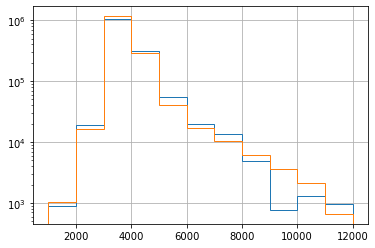

In [122]:
#gaia_x_PAN.Te_bv.hist(log=True, range=(1000,12000), bins=11, histtype='step')
gaia_x_PAN.Te_vk.hist(log=True, range=(1000,12000), bins=11, histtype='step')
#gaia_x_PAN.Te_gr.hist(log=True, range=(1000,12000), bins=11, histtype='step')
gaia_x_PAN.Teff.hist(log=True, range=(1000,12000), bins=11, histtype='step')


In [84]:
gaia_x_PAN.to_pickle('e:/gaia_x_PAN.pkl')

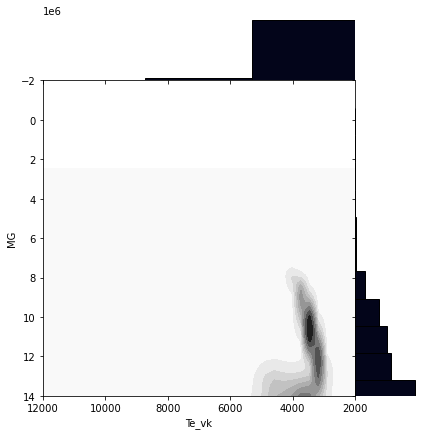

In [87]:
g = sns.JointGrid(data=gaia_x_PAN, x="Te_vk", y="MG", space=0, xlim=(12000,2000), ylim=(14,-2)) #, xlim=(-5,6), ylim=(14,-2)
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=10, cmap="gray_r") #,  clip=((-.1, 4.1), (14, -2))
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=16)

In [99]:
gaia_x_PAN[(gaia_x_PAN.MG>14)&(gaia_x_PAN.MG<15)]

,source_id,ra_x,dec_x,MG,Teff,Te_gr,Te_ri,Te_iz,dist_pc,gMeanPSFMag,...,g_r,r_i,i_z,B,V,B_V,R_I,V_K,Te_bv,Te_vk
0,4128310234077306496,258.121153,-19.511725,14.518689,4572.589309,5029.764008,4495.189394,4942.759297,140.839145,20.659000,...,0.697100,0.332300,0.128801,21.104193,20.251798,0.852395,0.544300,2.231744,5223.699409,4930.256479
1,4089485379041340416,275.826967,-23.483799,14.012720,4335.501777,4339.168996,4290.376584,3948.872668,147.396799,20.471201,...,1.042002,0.385399,0.322300,21.024347,19.864507,1.159840,0.597399,2.874715,4520.167116,4361.771108
2,4089468572867969664,276.497287,-23.307356,14.770424,4290.271615,5087.513136,4197.805709,4184.557769,92.208979,20.250700,...,0.672501,0.411098,0.268101,20.688193,19.857726,0.830467,0.623098,2.279290,5281.432626,4883.367796
3,4282723241890440832,283.270391,5.929569,14.346411,3506.835852,2684.728963,2030.292613,2320.752010,144.743482,23.555000,...,2.590000,1.682699,0.997400,24.592670,22.052944,2.539726,1.894699,6.958226,NaN,2738.960453
5,4089485413358847104,275.808447,-23.484260,14.402308,4015.748374,4196.021335,4183.396113,4354.805443,91.888842,20.066500,...,1.127699,0.415201,0.232599,20.646469,19.410239,1.236231,0.627201,3.053258,4332.913289,4186.768985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549504,2018607489221821952,294.090255,22.267856,14.186166,3483.744745,3227.813926,4.901264,5937.500000,162.916339,22.271999,...,1.906898,1019.365101,0.000000,23.095859,21.165049,1.930809,1019.577101,1156.802516,2668.213058,NaN
1549506,2018607832819297280,294.058091,22.256917,14.310632,3343.351140,3130.114712,2376.312355,2325.582134,114.657531,22.026800,...,2.012300,1.324100,0.993999,22.883650,20.858886,2.024765,1.536100,5.576283,2375.885501,3029.916487
1549507,2018608176440472704,294.020896,22.287099,14.755446,3477.558161,3470.011683,2459.419263,2806.912980,130.769608,22.254601,...,1.671200,1.253000,0.713800,23.004686,21.283979,1.720708,1.465000,4.919377,2967.865801,3136.202462
1549517,2018613257366826752,294.066644,22.371833,14.216360,3537.748368,3334.658699,2594.032388,2804.636968,146.174620,21.956800,...,1.798700,1.147501,0.714899,22.746794,20.912432,1.834361,1.359501,5.015545,2829.158531,3161.673344


In [108]:
print, gaia_x_PAN[gaia_x_PAN.Teff<2000].count() - gaia_x_PAN[gaia_x_PAN.Te_vk<2000].count()

(<function print>,
 source_id       562
 ra_x            562
 dec_x           562
 MG              562
 Teff            562
 Te_gr           523
 Te_ri           527
 Te_iz           565
 dist_pc         562
 gMeanPSFMag     562
 rMeanPSFMag     562
 iMeanPSFMag     562
 zMeanPSFMag     562
 g_r             562
 r_i             562
 i_z             562
 B               562
 V               562
 B_V             562
 R_I             562
 V_K             562
 Te_bv          1160
 Te_vk           464
 dtype: int64)

Text(0, 0.5, 'T_vk')

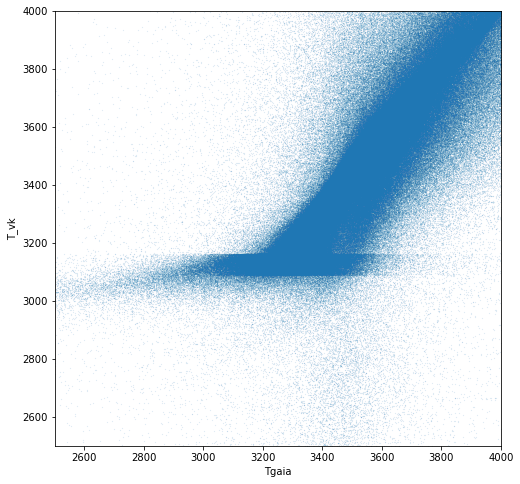

In [128]:
fig = plt.figure(figsize=(8,8))
plt.plot(gaia_x_PAN.Teff,gaia_x_PAN.Te_vk, '.', markersize=.1)
plt.xlim(2500,4000)
plt.ylim(2500,4000)
plt.xlabel('Tgaia')
plt.ylabel('T_vk')